### Rename the files in the folder

In [33]:
# import os
#
# targetFolder = "edge-detect"
# files = sorted(os.listdir(targetFolder))
#
# image_files = [file for file in files if (file.lower().endswith((".jpg", ".png", ".jpeg")))]
#
# for i, old_name in enumerate(image_files):
#     _, ext = os.path.splitext(old_name)
#     new_name = f"image-{i}{ext}"
#
#     old_path = os.path.join(targetFolder, old_name)
#     new_path = os.path.join(targetFolder, new_name)
#
#     if old_path != new_path:
#         os.rename(old_path, new_path)
#         print(f"Renamed: {old_name} → {new_name}")

# Edge detection

In [34]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

### Show images

In [35]:
def show_images(images, titles=None, cols=4, figsize=(15, 8), cmap='gray'):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=figsize)
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap=cmap)
        if titles:
            plt.title(titles[i], fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

### load all the images in the folder

In [36]:
folder = './edge-detect'
image_files = sorted([f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

# List to hold loaded images
images = []
image_names = []

for file in image_files:
    path = os.path.join(folder, file)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        images.append(img)
        image_names.append(file)

print(image_names)

['image-0.jpg', 'image-1.jpg', 'image-2.jpg', 'image-3.jpg', 'image-4.jpg', 'image-5.jpg']


### Canny edge detection

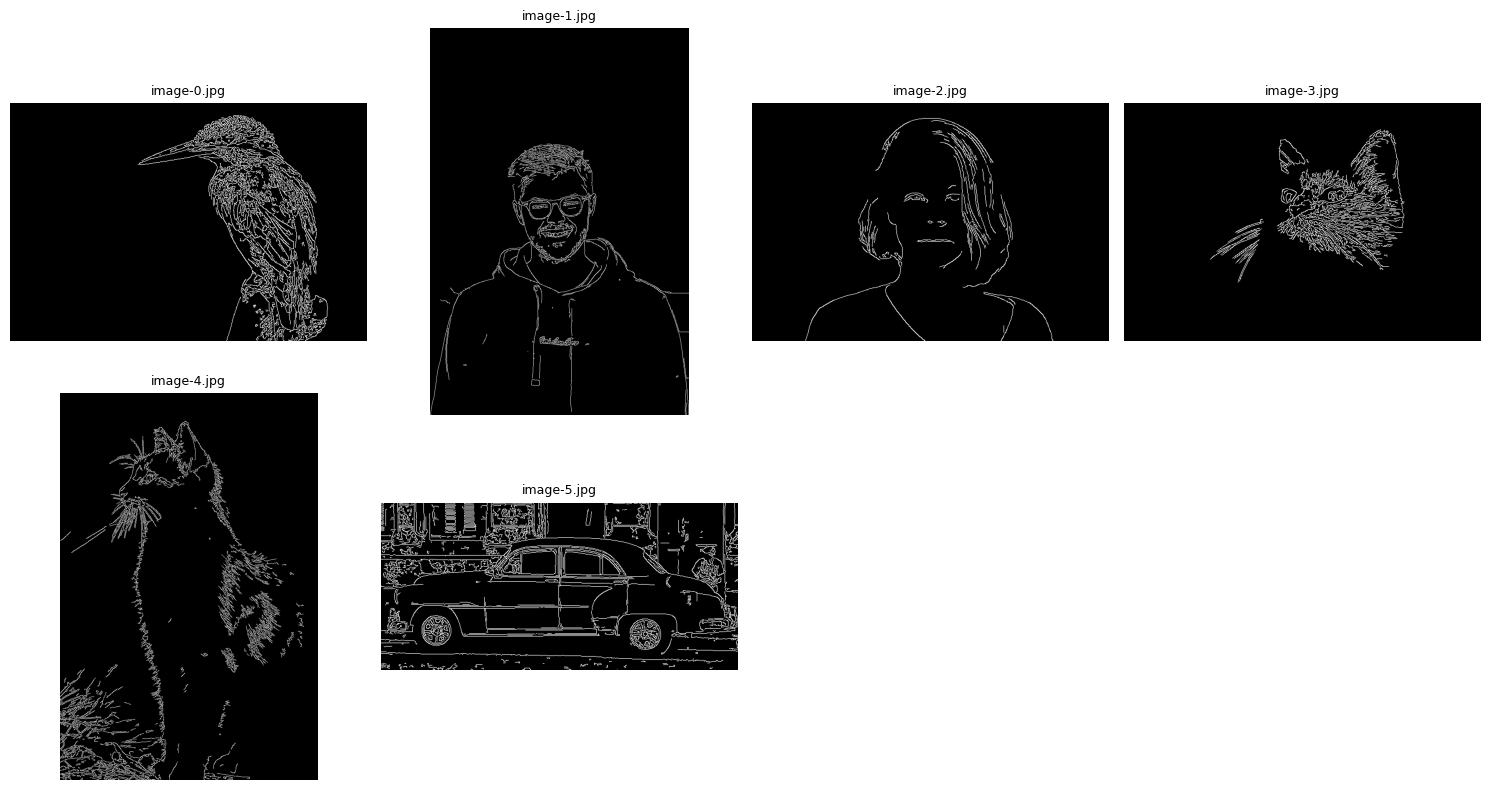

In [37]:
canny_edge = []

for i, img in enumerate(images):
    detected = cv2.Canny(img, 100, 200)
    canny_edge.append(detected)

show_images(canny_edge, image_names)

### Sobel edge detection

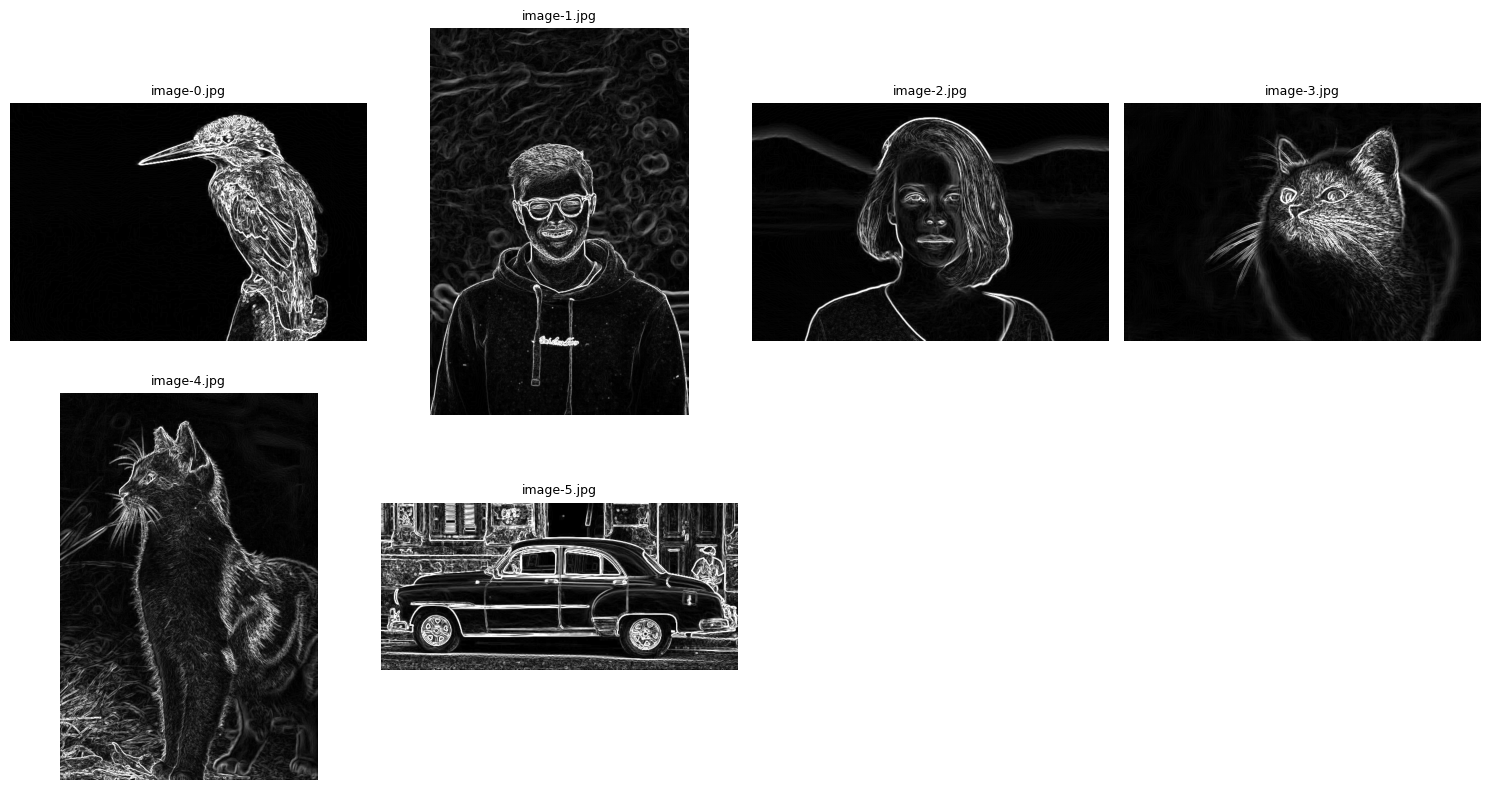

In [38]:
sobel_edges = []
for img in images:
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = cv2.magnitude(sobel_x, sobel_y)
    sobel = cv2.convertScaleAbs(magnitude)
    sobel_edges.append(sobel)

show_images(sobel_edges, image_names)

### Preweitt edge detection

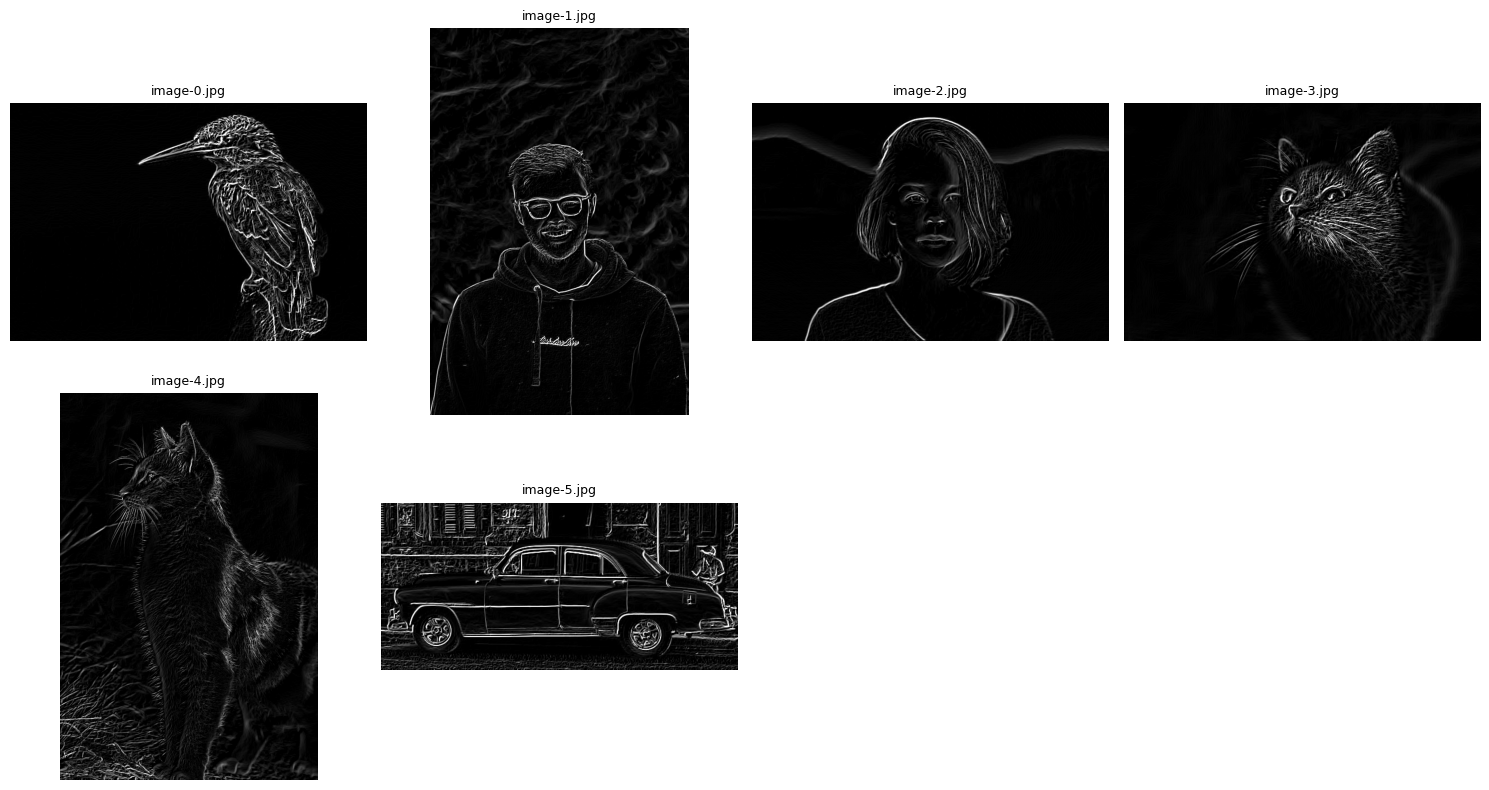

In [39]:
prewitt_edges = []

kernel_x = np.array([[1, 0, -1],
                    [1, 0, -1],
                    [1, 0, -1]])
kernel_y = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]])

for img in images:
    px = cv2.filter2D(img, -1, kernel_x)
    py = cv2.filter2D(img, -1, kernel_y)
    magnitude = cv2.magnitude(np.float32(px), np.float32(py))
    prewitt = cv2.convertScaleAbs(magnitude)
    prewitt_edges.append(prewitt)
show_images(prewitt_edges, image_names)

### Comparison

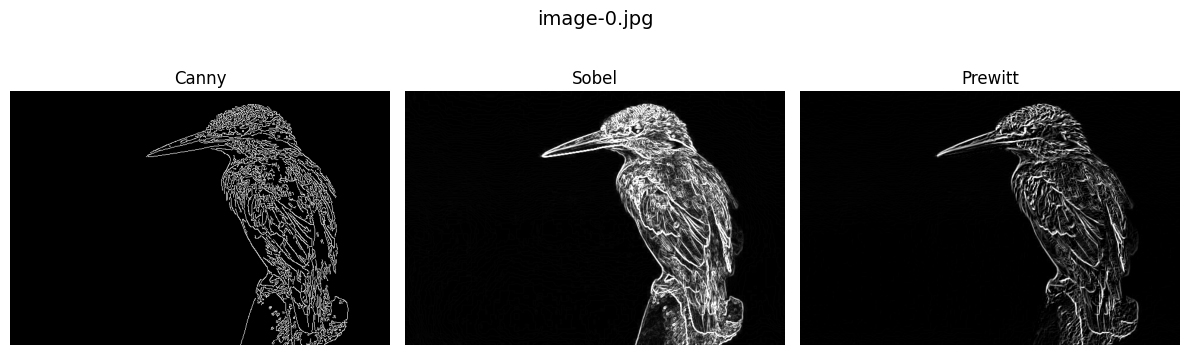

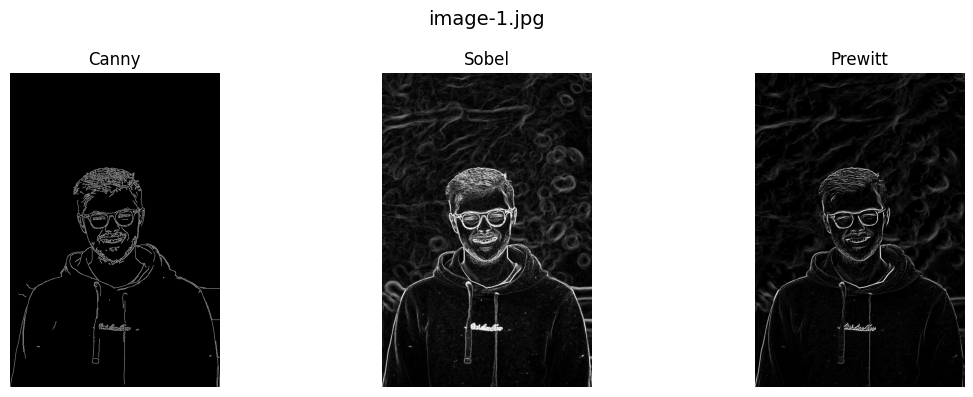

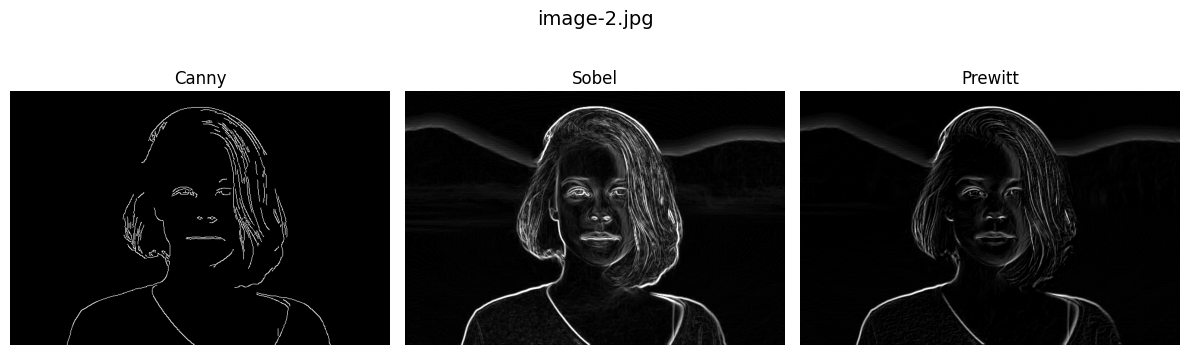

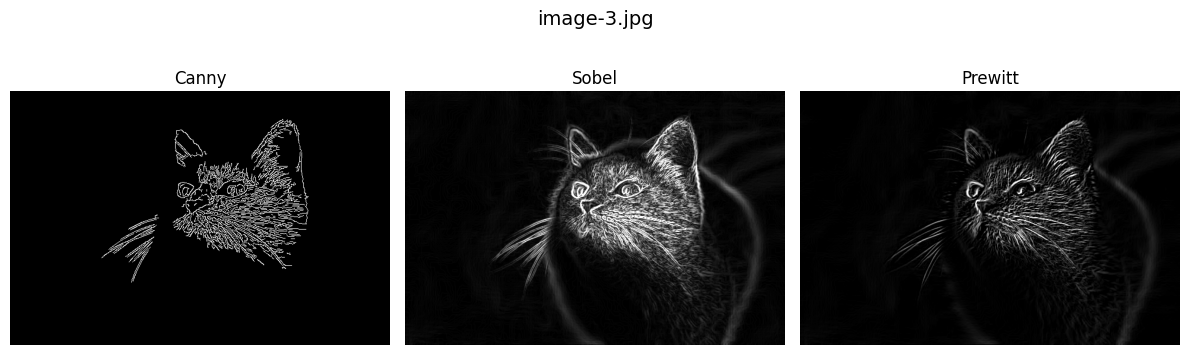

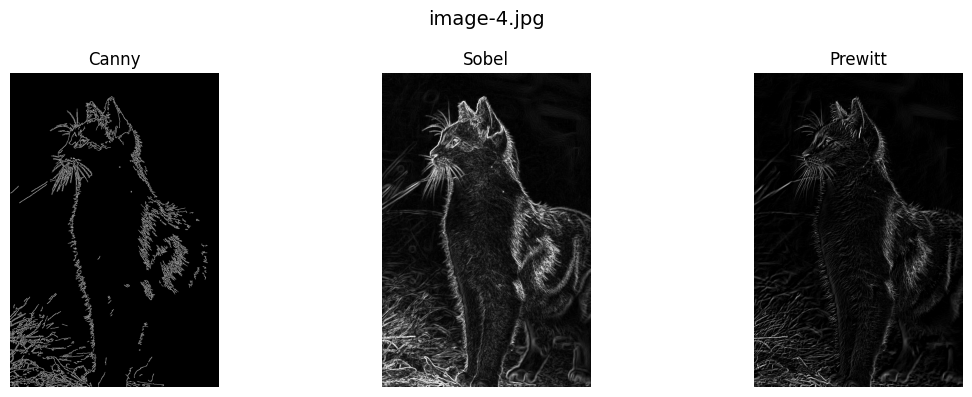

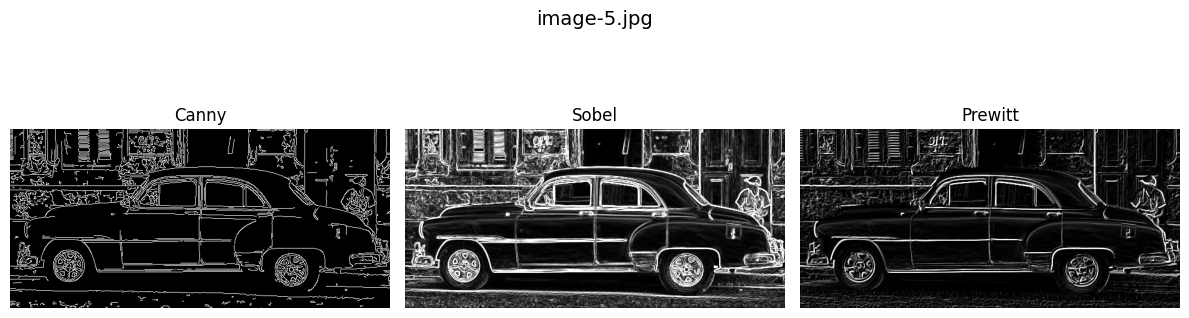

In [40]:

def show_comparison(canny, sobel, prewitt, titles=None, figsize=(12, 4)):
    total = len(canny)
    for i in range(total):
        plt.figure(figsize=figsize)

        # Canny
        plt.subplot(1, 3, 1)
        plt.imshow(canny[i], cmap='gray')
        plt.title("Canny")
        plt.axis('off')

        # Sobel
        plt.subplot(1, 3, 2)
        plt.imshow(sobel[i], cmap='gray')
        plt.title("Sobel")
        plt.axis('off')

        # Prewitt
        plt.subplot(1, 3, 3)
        plt.imshow(prewitt[i], cmap='gray')
        plt.title("Prewitt")
        plt.axis('off')

        if titles:
            plt.suptitle(titles[i], fontsize=14)

        plt.tight_layout()
        plt.show()

show_comparison(canny_edge, sobel_edges, prewitt_edges, image_names)


### Show overlay images comparision

In [41]:
def show_overlay_comparison(images, canny, sobel, prewitt, titles=None, figsize=(15, 5)):
    total = len(images)
    for i in range(total):
        plt.figure(figsize=figsize)

        # Overlay for Canny edges (red)
        overlay_canny = overlay_edges(images[i], canny[i], edge_color=(255, 0, 0), alpha=0.7)
        # Overlay for Sobel edges (green)
        overlay_sobel = overlay_edges(images[i], sobel[i], edge_color=(0, 255, 0), alpha=0.7)
        # Overlay for Prewitt edges (blue)
        overlay_prewitt = overlay_edges(images[i], prewitt[i], edge_color=(0, 0, 255), alpha=0.7)

        # Plot overlays
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(overlay_canny, cv2.COLOR_BGR2RGB))
        plt.title("Canny Overlay")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(overlay_sobel, cv2.COLOR_BGR2RGB))
        plt.title("Sobel Overlay")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(overlay_prewitt, cv2.COLOR_BGR2RGB))
        plt.title("Prewitt Overlay")
        plt.axis('off')

        if titles:
            plt.suptitle(titles[i], fontsize=14)

        plt.tight_layout()
        plt.show()


### overlay images onto the detected

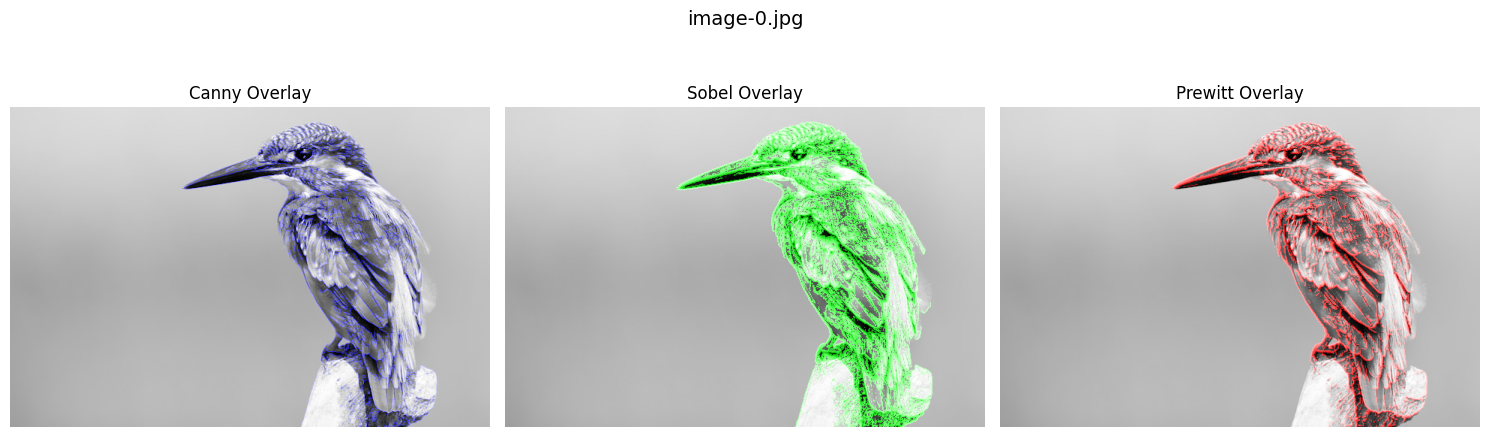

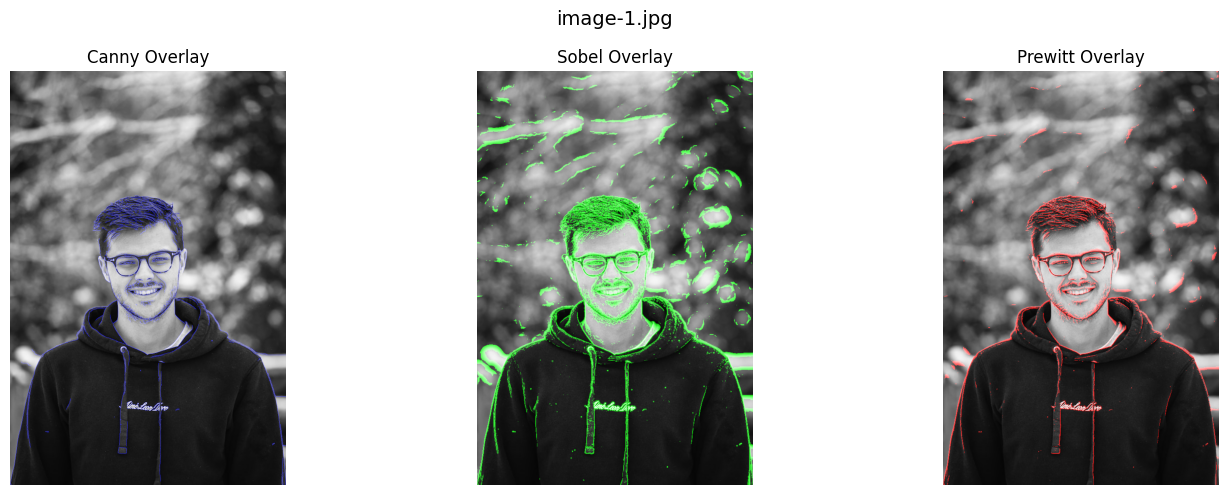

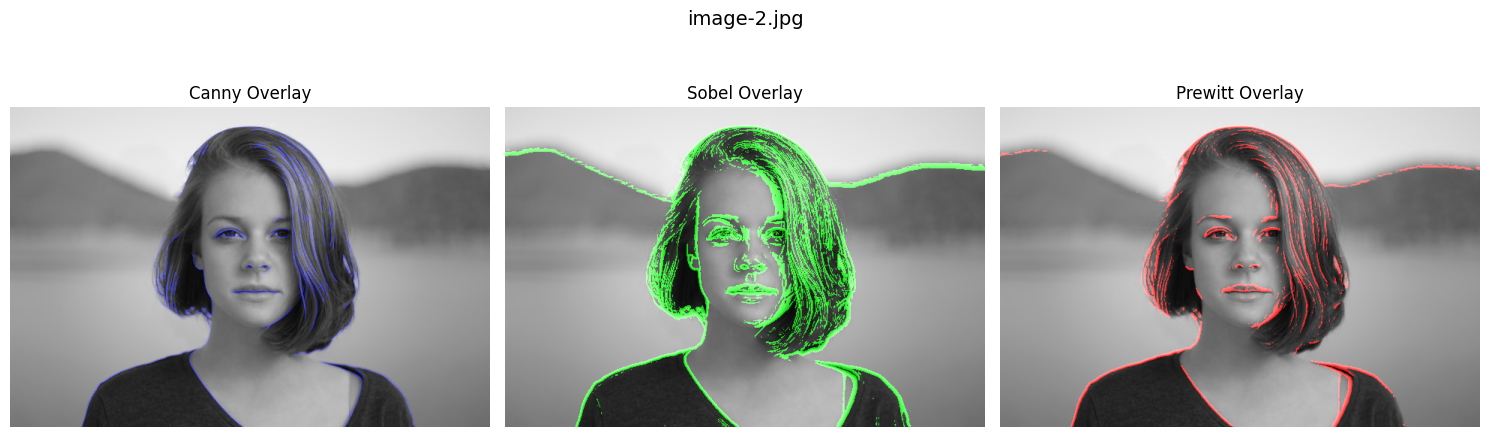

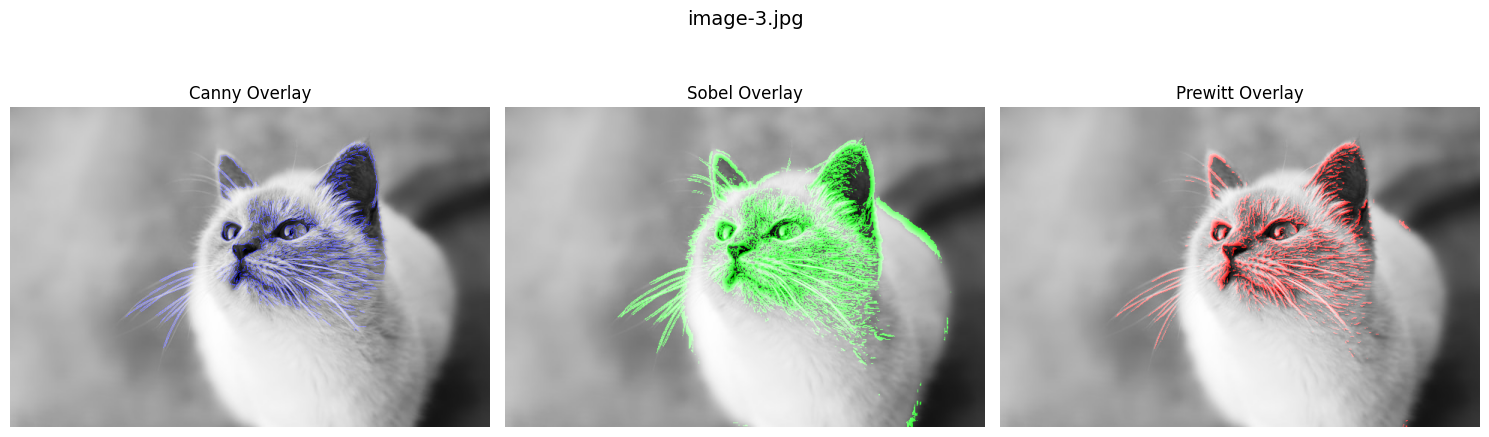

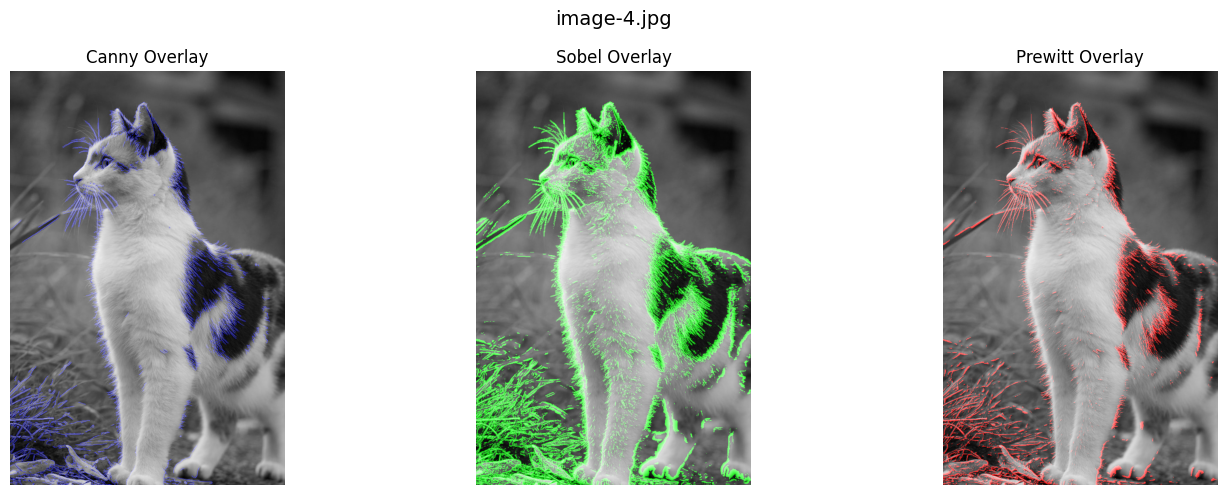

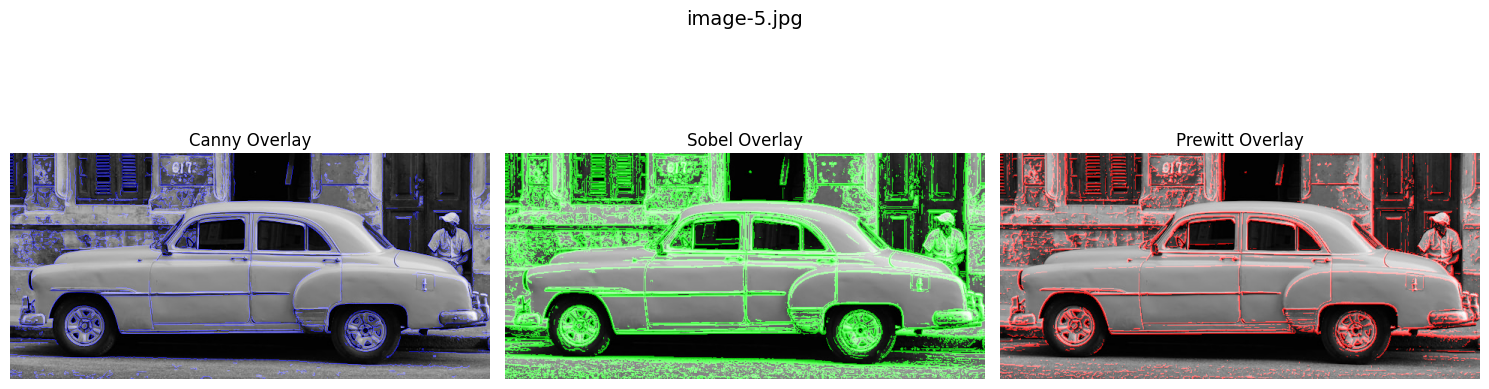

In [42]:
def overlay_edges(original, edges, edge_color=(255, 0, 0), alpha=0.6):

    # Convert grayscale original to BGR color
    original_color = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)

    # Make binary mask of edges (threshold)
    _, edges_binary = cv2.threshold(edges, 50, 255, cv2.THRESH_BINARY)

    # Create an empty color image same size as original
    edges_colored = np.zeros_like(original_color)

    # Paint the edge pixels with edge_color
    edges_colored[edges_binary == 255] = edge_color

    # Blend original image and colored edges
    overlayed = cv2.addWeighted(original_color, 1.0, edges_colored, alpha, 0)
    return overlayed

show_overlay_comparison(images, canny_edge, sobel_edges, prewitt_edges, image_names)
